# Model quantum FROG (GS) Algorithm

In [1]:
#Preliminaries
#Specify path to whitepeaks framework
whitePeaksFolder='C:\\Users\\s4schwar\\Documents\\GitHub\\whitepeaks\\'

#Current notebook directory
notebookDirectory=%pwd

#Change to whitepeaks folder, load package and change back to notebookDirectory
from os import chdir
chdir( whitePeaksFolder )
from whitepeaks import *
chdir( notebookDirectory )

## Generate state

Input state


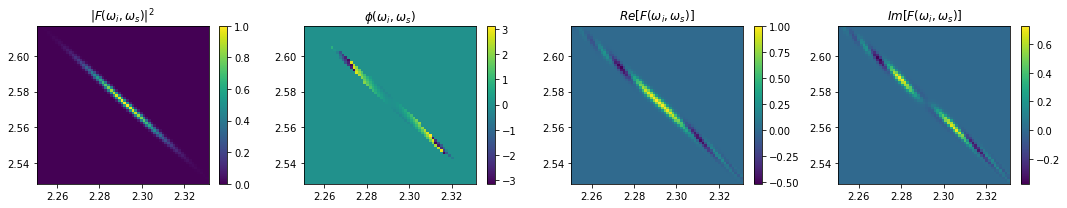


Time-frequency data


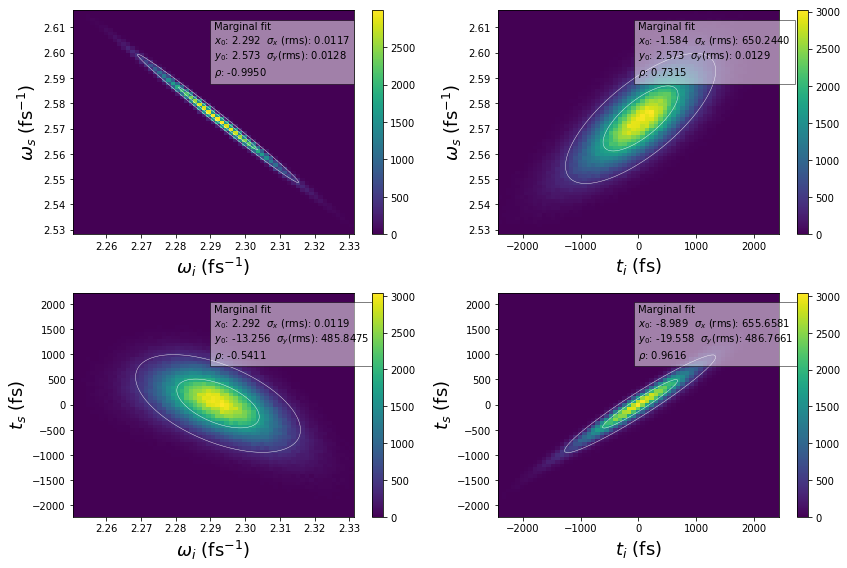

dw: 0.0012870563308622351 0.0014073729175381189
dt: 77.48930464228215 70.86472879442817
Grid size: (64, 64) (64, 64) (64, 64) (64, 64)
Fit cost: 0.10974729476240254 4.683475243088357 7.47977746111818 3.4189496896864386


In [3]:
wi0,sigma_i=w2f(0.822),0.01166
ws0,sigma_s=w2f(0.732),0.01275

rho=-0.995
Ai,As=20000,-10000.0
Ai3,As3=1e5,1e5
Ap=0

Wi,Ws,F=gaussian_state(wi0,ws0,sigma_i,sigma_s,rho,Ai=Ai,As=As,Ap=Ap,Nsigma=[1.5,1.5],Nsamples=[2**6,2**6])

F=F*np.exp(1j*As3*(Ws-ws0)**3+1j*Ai3*(Wi-wi0)**3)


print('Input state')
amplitude=np.abs(F)
phase=np.angle(F)
phase[np.where(amplitude**2/np.max(amplitude**2)<0.05)]=0

fig,ax=plt.subplots(1,4,figsize=(15,3))
ax.reshape(-1)
S1=ax[0].pcolormesh(Wi,Ws,amplitude**2)
S2=ax[1].pcolormesh(Wi,Ws,phase)
S3=ax[2].pcolormesh(Wi,Ws,F.real)
S4=ax[3].pcolormesh(Wi,Ws,F.imag)
[ax[i].set_title([r'$|F(\omega_i,\omega_s)|^2$',r'$\phi(\omega_i,\omega_s)$',r'$Re[F(\omega_i,\omega_s)]$',r'$Im[F(\omega_i,\omega_s)]$'][i]) for i in range(4)]
[fig.colorbar([S1,S2,S3,S4][i],ax=ax[i]) for i in range(4)]
plt.tight_layout()
plt.show()

print('\nTime-frequency data')
tf_data=create_tf_data((Wi,Ws,F),add_poisson_noise=True,Nphotons=3000)
Wi,Ws,Ti,Ts,Iww,Itw,Iwt,Itt=tf_data

plot_tf_data(tf_data,fit=True)


## Run Algorithm

Iterations 5000
Grid_size (64, 64)


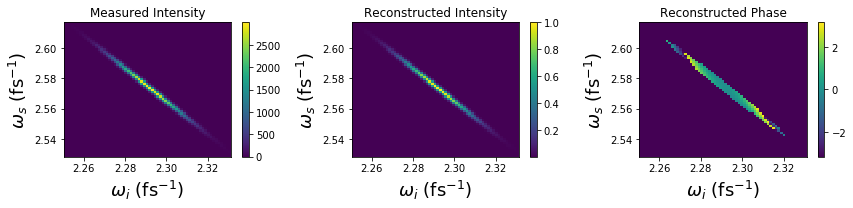

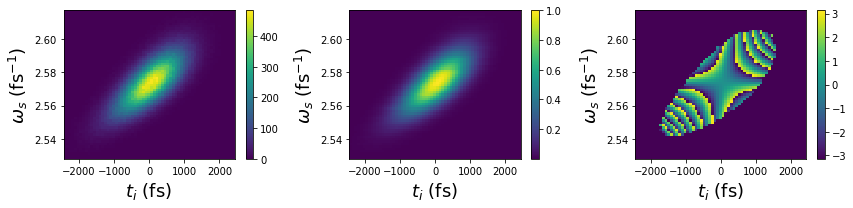

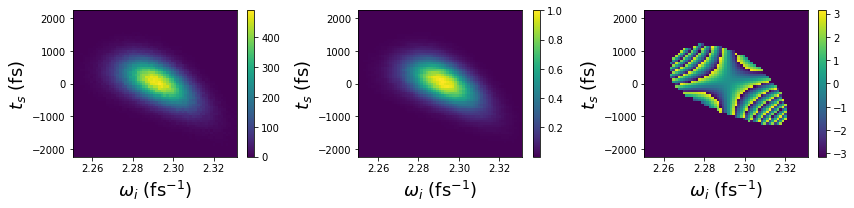

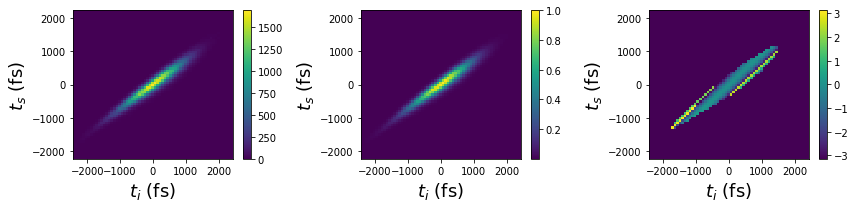

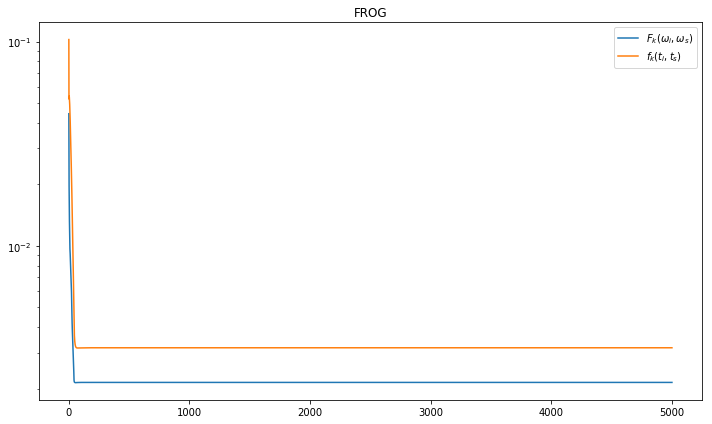

FROG 0.0021447814004835297 0.003169409592386511
NRMS 0.04689094545404567 0.04624827188444304
KL 4.222778254048752 6.903275090797858


In [6]:
output=run_gs_algorithm(tf_data,5000,error_model='FROG',method='full')

## Fit phase

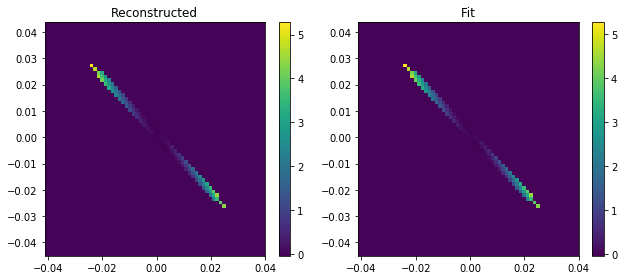

Cost
 0.004371935494728004 
Centre
 2.2915295331598546 2.5733154393025464 
Coeff
 [[ 8.84423049e-03 -3.59521445e-01 -9.99940311e+03  9.99813842e+04]
 [-4.53921425e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.99897879e+04  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 9.89848489e+04  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [7]:
i,Fk,_,_,fk,errors=output

c=polyfit2phase(Wi,Ws,Fk)

[ 5.54087873e+01  1.13204364e-05 -1.27865177e-05  1.62555638e-02
  1.77689741e-02 -9.95011889e-01  2.26527492e-01]
[ 5.54087873e+01  1.13204364e-05 -1.27865177e-05  1.62555638e-02
  1.77689741e-02 -9.95011889e-01  2.26527492e-01  3.18931325e-01
  1.31121177e-01  7.51341717e-01  4.27114228e-01  1.58832277e-01
  7.83090559e-01  9.86979058e-01]


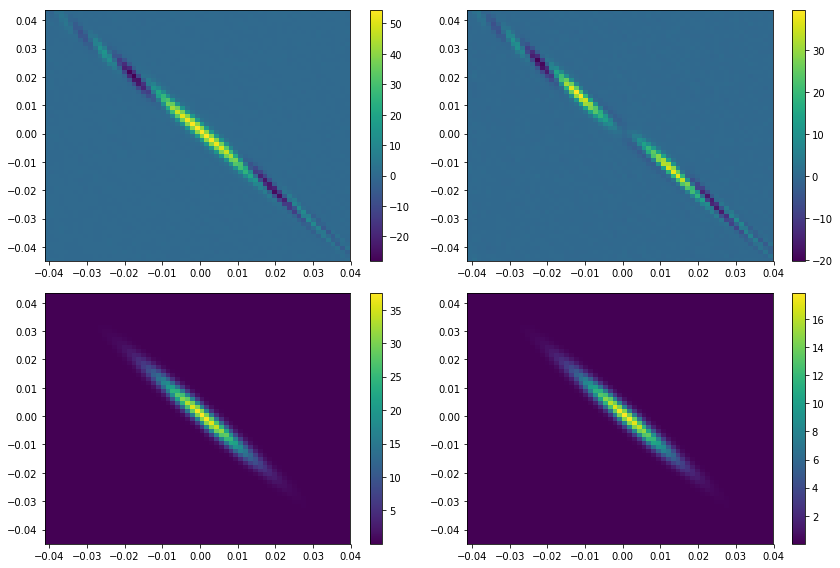

 active_mask: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
        cost: 58653.31837098148
         fun: array([0.50293079, 1.66225844, 0.40856083, ..., 0.29677948, 0.07985443,
       0.6843523 ])
        grad: array([-5.10188345e+02,  3.08964095e+04,  1.72720509e+03,  2.96552796e+04,
       -9.12696088e+03,  1.13075368e+05,  4.93616421e+02, -6.89208358e-01,
       -2.40945841e+00, -2.44386799e+00, -2.56310712e+00,  1.58149063e-04,
       -1.89352650e-03,  1.63449456e+04])
         jac: array([[ 0.00000000e+00,  3.41553241e-03,  4.65430319e-03, ...,
         9.46223736e-07,  1.19954348e-06, -1.33829713e-02],
       [ 0.00000000e+00,  1.35572255e-03,  1.81835890e-03, ...,
         3.27825546e-07,  4.61935997e-07, -5.22848964e-03],
       [ 0.00000000e+00,  1.37587637e-03,  1.81678683e-03, ...,
         3.05473804e-07,  4.69386578e-07, -5.22398204e-03],
       ...,
       [ 0.00000000e+00, -2.16188282e-03, -2.54225731e-03, ...,
         2.16066837e-07,  3.57627869e-07,

In [8]:
def complexgauss2D(xy,a,x0,y0,sigma_x,sigma_y,rho,k1,A1,A2,B1,B2,C1,C2,k2):
    
    X,Y=xy
    
    amplitude=gauss2d(xy,a,x0,y0,sigma_x,sigma_y,rho,k1)
    
    phase=np.exp(1j*(C1*(X-x0)**3+C2*(Y-y0)**3
           +B1*(X-x0)**2+B2*(Y-y0)**2 
           +A1*(X-x0) + A2*(Y-y0) +k2))
    
    return amplitude*phase
    
          
def complexgauss2D_cost(p,x,y,z):
    '''
    Cost function for poly fit. To be used with
    scipy.optimize.least_squares fitting function.
    '''
    #return np.sqrt((np.real(z)-np.real(complexgauss2D([x,y],*p)))**2+(np.imag(z)-np.imag(complexgauss2D([x,y],*p)))**2)
    return np.abs(np.real(z)-np.real(complexgauss2D([x,y],*p)))+np.abs(np.imag(z)-np.imag(complexgauss2D([x,y],*p)))


def fit_complexgauss2D(data,p0=None):

        X,Y,Z=data

        res=least_squares(complexgauss2D_cost,p0,args=(X.reshape(-1),Y.reshape(-1),Z.reshape(-1)))

        return res

pfit=fit_gaussian((Wi-wi0,Ws-ws0,np.abs(Fk))).x

print(pfit)

p0=np.concatenate((pfit,np.array([0,0,3e4,-1e4,1e4,1e4,0])))
p0=np.concatenate((pfit,np.random.rand(7)))
print(p0)


                          
fit=fit_complexgauss2D([Wi-wi0,Ws-ws0,Fk],p0=p0)

Ffit=complexgauss2D([Wi-wi0,Ws-ws0],*fit.x)

fig,ax=plt.subplots(2,2,figsize=(12,8))
ax=ax.reshape(-1)
S1=ax[0].pcolormesh(Wi-wi0,Ws-ws0,np.real(Fk))
S2=ax[1].pcolormesh(Wi-wi0,Ws-ws0,np.imag(Fk))
S3=ax[2].pcolormesh(Wi-wi0,Ws-ws0,np.real(Ffit))
S4=ax[3].pcolormesh(Wi-wi0,Ws-ws0,np.imag(Ffit))
[fig.colorbar([S1,S2,S3,S4][i],ax=ax[i]) for i in range(4)]
plt.tight_layout()
plt.show()

print(fit)

In [9]:
Fk.imag

array([[ 0.151747  ,  1.2549772 ,  0.27850973, ..., -0.14465622,
        -0.31406365,  1.15485279],
       [ 0.34439597,  0.58163868,  0.21475568, ..., -0.66013665,
         2.09103429, -1.92526269],
       [ 0.3220462 ,  0.16187195, -0.09004087, ...,  2.68003728,
        -1.70346011, -0.2429161 ],
       ...,
       [-0.06145668,  0.32167956,  2.88273329, ..., -0.19449277,
         0.37430964, -0.26399438],
       [-0.34138687,  1.51539787,  2.72505755, ...,  0.07219601,
        -0.52353965, -0.02574329],
       [-0.10479558,  1.90109174,  1.10294452, ..., -0.1955474 ,
         0.01567632,  0.11282121]])

[[0.65025723]
 [0.48726039]
 [0.91540205]
 [0.97827129]
 [0.11061655]
 [0.56252197]
 [0.13934113]]


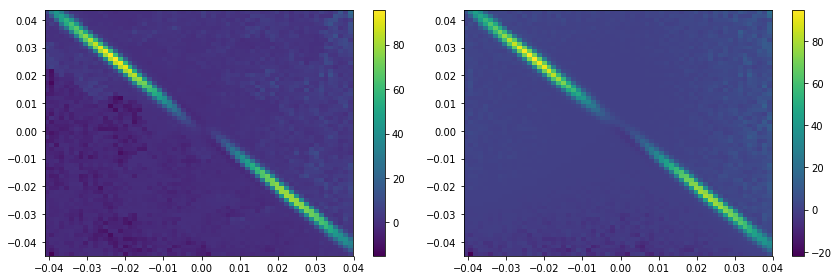

[ 6.04704142e+01  5.60889706e+01  1.27222987e+04 -3.96066778e+03
  1.63822679e+05  1.46648748e+05  1.11631815e-02]


In [10]:

amplitude=np.abs(Fk)
phase=unwrap_phase(np.angle(Fk))
wphase=amplitude*phase

#Create function
def surfit(x,A1,A2,B1,B2,C1,C2,k2):
    X,Y,A=x

    return A*(C1*X**3+C2*Y**3
        +B1*X**2+B2*Y**2 
        +A1*X + A2*Y +k2)

p0=np.random.rand(7,1)
print(p0)
p0=[0,0,2e4,-1e4,1e5,1e5,10]

out=curve_fit(surfit,[(Wi-wi0).reshape(-1),(Ws-ws0).reshape(-1),np.abs(Fk).reshape(-1)],wphase.reshape(-1),p0=p0)

fig,ax=plt.subplots(1,2,figsize=(12,4))
ax.reshape(-1)
S1=ax[0].pcolormesh(Wi-wi0,Ws-ws0,wphase)
S2=ax[1].pcolormesh(Wi-wi0,Ws-ws0,surfit([Wi-wi0,Ws-ws0,amplitude],*out[0]))
[fig.colorbar([S1,S2][i],ax=ax[i]) for i in range(2)]
plt.tight_layout()
plt.show()

print(out[0])